In [350]:
from scipy.stats import expon, gamma, chi, lognorm, cauchy, beta, cosine, wald, trapezoid, exponpow, norm, poisson,moment, geom
from numpy import mean, var
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [368]:
# set configurations for number of samples and moments
s_size = 1000
nr_sample = 25
nr_moments =5

In [369]:
# Samples from different distributions
# exponential
ex_lambda = 3.5
r_expon = expon.rvs(size=(nr_sample,s_size), scale = 1/ex_lambda, random_state=10)

# gamma
alpha = 1
r_gamma = gamma.rvs(alpha, size=(nr_sample, s_size), random_state=10)

# chi
d_f = 25
r_chi = chi.rvs(d_f, size=(nr_sample, s_size), random_state=10)

# lognormal
s = 1
r_lognorm = lognorm.rvs(s, size=(nr_sample, s_size), random_state=10)

# beta
a, b = 0.5, 0.5
r_beta = beta.rvs(a, b, size=(nr_sample, s_size), random_state=10)

# trapezoind
c, d = 0.3, 0.4
r_trapezoid = trapezoid.rvs(c, d, size=(nr_sample, s_size), random_state=10)

# exponpow
b = 5
r_exponpow = exponpow.rvs(b, size=(nr_sample, s_size), random_state=10)

# normal
r_norm = norm.rvs(size=(nr_sample, s_size), random_state=10)

# cosine
r_cosine = cosine.rvs(size=(nr_sample, s_size), random_state=10)

# cauchy
r_cauchy = cauchy.rvs(size=(nr_sample, s_size), random_state=10)

# poisson
mu = 10
r_pois = poisson.rvs(mu, size=(nr_sample, s_size), random_state=10)



In [372]:
rvs = [r_expon, r_gamma, r_lognorm, r_beta, r_trapezoid, r_norm]
dists_names = ['exponential', 'gamma', 'lognormal','beta', 'trapezoid', 'normal']

df_final = pd.DataFrame()

# parameter moment is the central mean, so I used mean() for n=1
for i in range(len(rvs)):
    m = np.zeros((nr_moments,nr_sample))
    m[0,]  = mean(rvs[i], axis = 1)
    for n in range(2,nr_moments+1):
        m[n-1,] = moment(rvs[i], n, axis=1)
        
    df_temp = pd.DataFrame(np.transpose(m))
    df_temp['dist'] = dists_names[i]

    df_final=pd.concat([df_final, df_temp], ignore_index=True)
    
# write to csv
df_final.to_csv('moments.csv', index=False) 

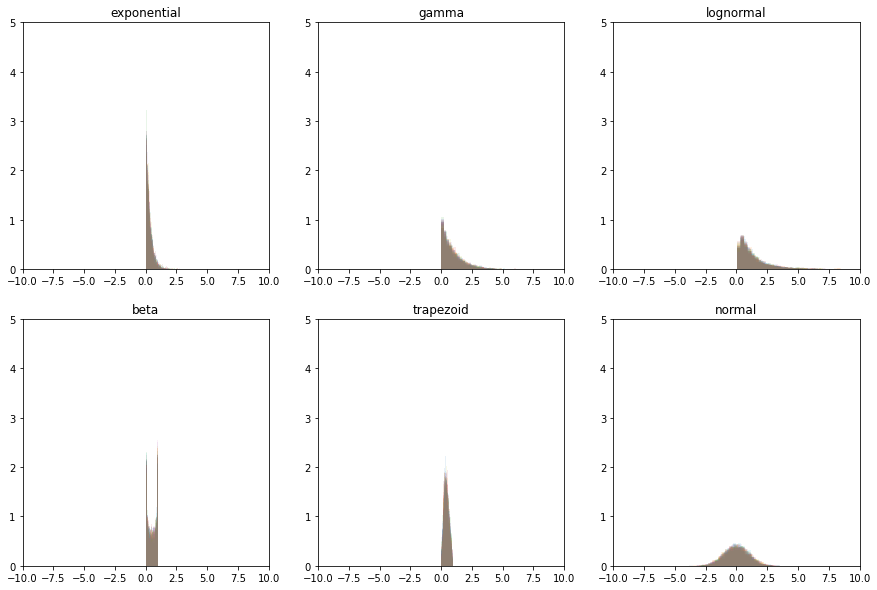

In [374]:
# plotting
nrow = 2
ncol = 3
fig, ax = plt.subplots(nrow, ncol, figsize =(15,10))

for row in range(nrow):
    for col in range(ncol):
        for i in range(nr_sample):
            ax[row,col].hist(rvs[row*3+col][i,:], density=True, bins='auto', histtype='stepfilled', alpha=0.1)
            ax[row,col].set_title(dists_names[row*3+col])
            ax[row,col].set_xlim(-10,10)
            ax[row,col].set_ylim(0,5)

In [286]:
df_final.head()

,0,1,2,3,4,dist
0,0.472515,0.215198,0.214862,0.489494,1.208886,exponential
1,0.501796,0.249386,0.232755,0.492877,1.031487,exponential
2,0.467825,0.222402,0.231120,0.568067,1.641068,exponential
3,0.525629,0.245039,0.205732,0.395267,0.715290,exponential
4,0.499297,0.248144,0.230677,0.460638,0.888709,exponential


In [366]:
pd.set_option('display.max_rows', None)
df_final

,0,1,2,3,4,dist
0,0.278477,0.076947,0.039534,0.044959,0.050045,exponential
1,0.294094,0.090901,0.069032,0.132611,0.306223,exponential
2,0.273634,0.081426,0.043785,0.048736,0.053657,exponential
3,0.277206,0.074974,0.037583,0.041791,0.046933,exponential
4,0.265108,0.070054,0.036772,0.040880,0.045851,exponential
5,0.287305,0.086687,0.052420,0.071863,0.110257,exponential
6,0.270158,0.083211,0.061479,0.098035,0.175570,exponential
7,0.271438,0.074232,0.041453,0.052457,0.070142,exponential
8,0.279658,0.087117,0.066054,0.102184,0.170926,exponential
9,0.297224,0.087612,0.055138,0.075090,0.105865,exponential


In [375]:
df_final.var()

0    2.873299e-01
1    2.289104e+00
2    3.183828e+02
3    1.748333e+05
4    1.543855e+08
dtype: float64

In [365]:
p = np.linspace(0.1, 1, 10)
alpha = [1,2,3]


for i in p:
    for a in alpha:

        r_geom = geom.rvs(i, size=(nr_sample,1000), random_state=10)
        r_gamma = gamma.rvs(a, size=(nr_sample,1000) , random_state=10)

        
        rvs = [r_expon, r_geom]
        dists_names = ['exponential', 'geometric']

        df_final = pd.DataFrame()

        for k in range(len(rvs)):
            m = np.zeros((nr_moments,nr_sample))
            m[0,]  = mean(rvs[k], axis = 1)
            for n in range(2,nr_moments+1):
                m[n-1,] = moment(rvs[k], n, axis=1)

            df_temp = pd.DataFrame(np.transpose(m))
            df_temp['dist'] = dists_names[k]

            df_final=pd.concat([df_final, df_temp], ignore_index=True)
            
        X = df_final.drop('dist', axis=1)
        y = df_final['dist']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)

        X_train_scaled = scale(X_train)
        X_test_scaled = scale(X_test)
        
        param_grid = [
            {'C':np.linspace(0.1, 25, 20),
             'gamma':np.linspace(0.001, 10, 20),
             'kernel':['rbf']},
        ]

        optimal_params = GridSearchCV(SVC(), param_grid,cv=10, verbose=0)
        optimal_params.fit(X_train_scaled, y_train)
        
        c = optimal_params.best_params_['C']
        g = optimal_params.best_params_['gamma']

        clf_svm = SVC(random_state=10, C=c, gamma=g)
        clf_svm.fit(X_train_scaled, y_train)

        y_pred = clf_svm.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        print(i,cm)


0.1 [[0 5]
 [0 5]]
0.1 [[0 5]
 [0 5]]
0.1 [[0 5]
 [0 5]]
0.2 [[0 5]
 [0 5]]
0.2 [[0 5]
 [0 5]]
0.2 [[0 5]
 [0 5]]
0.30000000000000004 [[0 5]
 [0 5]]
0.30000000000000004 [[0 5]
 [0 5]]
0.30000000000000004 [[0 5]
 [0 5]]
0.4 [[0 5]
 [0 5]]
0.4 [[0 5]
 [0 5]]
0.4 [[0 5]
 [0 5]]
0.5 [[0 5]
 [0 5]]
0.5 [[0 5]
 [0 5]]
0.5 [[0 5]
 [0 5]]
0.6 [[0 5]
 [0 5]]
0.6 [[0 5]
 [0 5]]
0.6 [[0 5]
 [0 5]]
0.7000000000000001 [[0 5]
 [0 5]]
0.7000000000000001 [[0 5]
 [0 5]]
0.7000000000000001 [[0 5]
 [0 5]]
0.8 [[0 5]
 [0 5]]
0.8 [[0 5]
 [0 5]]
0.8 [[0 5]
 [0 5]]
0.9 [[0 5]
 [0 5]]
0.9 [[0 5]
 [0 5]]
0.9 [[0 5]
 [0 5]]
1.0 [[5 0]
 [5 0]]
1.0 [[5 0]
 [5 0]]
1.0 [[5 0]
 [5 0]]
